Accuracy: 80.00%


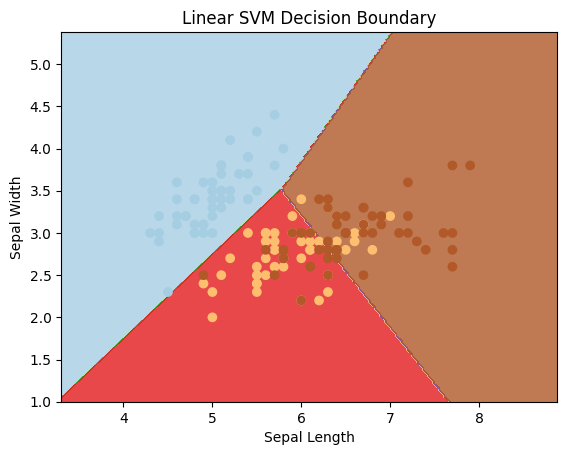

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features (sepal length and sepal width)
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a linear SVM classifier
clf = svm.SVC(kernel='linear')

# Train the SVM model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the decision boundary
def plot_decision_boundary(X, y, clf):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('Linear SVM Decision Boundary')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, clf)


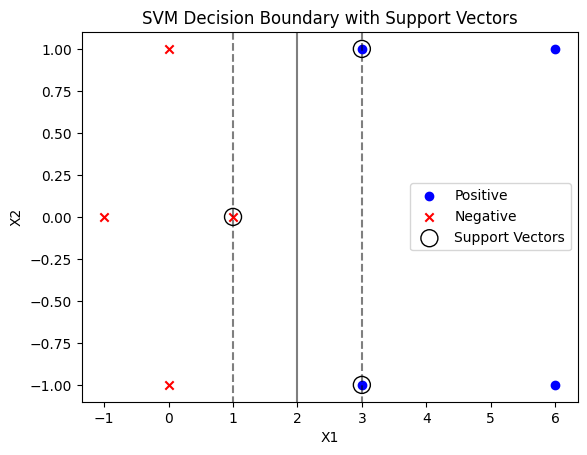

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Define the positive and negative label data points
positive_data = np.array([[3, 1], [3, -1], [6, 1], [6, -1]])
negative_data = np.array([[1, 0], [0, 1], [0, -1], [-1, 0]])

# Combine positive and negative data
X = np.vstack((positive_data, negative_data))
y = np.array([1, 1, 1, 1, -1, -1, -1, -1])

# Train a linear SVM classifier
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Get support vectors and their corresponding indices
support_vectors = clf.support_vectors_
support_vector_indices = np.where(np.isin(X, support_vectors).all(axis=1))[0]

# Plot the data points
plt.scatter(positive_data[:, 0], positive_data[:, 1], marker='o', label='Positive', color='blue')
plt.scatter(negative_data[:, 0], negative_data[:, 1], marker='x', label='Negative', color='red')

# Highlight support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=150, facecolors='none', edgecolors='black', label='Support Vectors')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
xy = np.column_stack([xx.ravel(), yy.ravel()])
Z = clf.decision_function(xy).reshape(xx.shape)

# Plot decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Decision Boundary with Support Vectors')
plt.show()


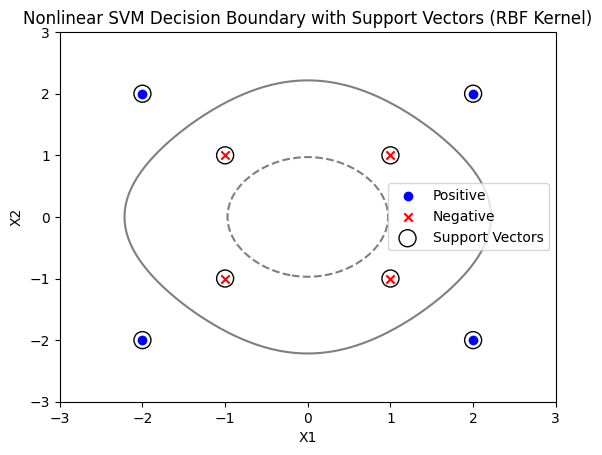

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Define the positive and negative label data points
positive_data = np.array([[2, 2], [2, -2], [-2, -2], [-2, 2]])
negative_data = np.array([[1, 1], [1, -1], [-1, -1], [-1, 1]])

# Combine positive and negative data
X = np.vstack((positive_data, negative_data))
y = np.array([1, 1, 1, 1, -1, -1, -1, -1])

# Train a nonlinear SVM classifier with an RBF kernel
clf = svm.SVC(kernel='rbf', C=1)
clf.fit(X, y)

# Get support vectors and their corresponding indices
support_vectors = clf.support_vectors_
support_vector_indices = np.where(np.isin(X, support_vectors).all(axis=1))[0]

# Plot the data points
plt.scatter(positive_data[:, 0], positive_data[:, 1], marker='o', label='Positive', color='blue')
plt.scatter(negative_data[:, 0], negative_data[:, 1], marker='x', label='Negative', color='red')

# Highlight support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=150, facecolors='none', edgecolors='black', label='Support Vectors')

# Create a mesh to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
xy = np.column_stack([xx.ravel(), yy.ravel()])
Z = clf.decision_function(xy).reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Nonlinear SVM Decision Boundary with Support Vectors (RBF Kernel)')
plt.show()


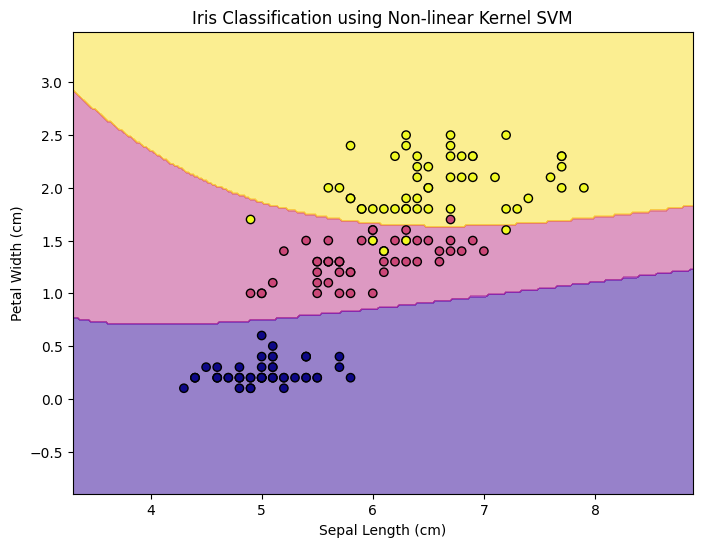

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load Iris dataset
iris = load_iris(as_frame=True)
df = iris.frame
X = df[['sepal length (cm)','petal width (cm)']].values # Select the first two features for visualization purposes
y = df.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a non-linear kernel SVM classifier
svm = SVC(kernel='poly',degree=5, random_state=42)
svm.fit(X_train, y_train)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
					np.arange(y_min, y_max, 0.02))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='plasma')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='plasma')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Classification using Non-linear Kernel SVM')
plt.show()


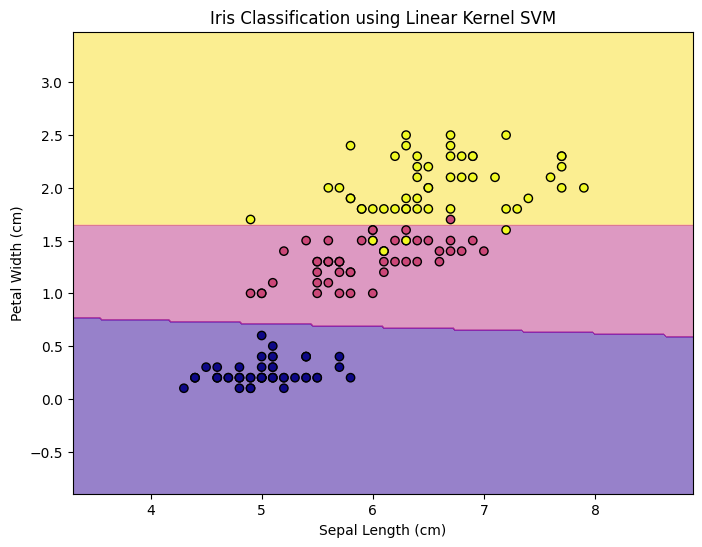

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load Iris dataset
iris = load_iris(as_frame=True)
df = iris.frame
X = df[['sepal length (cm)', 'petal width (cm)']].values  # Select the first and third features for visualization
y = df.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear kernel SVM classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='plasma')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='plasma')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Classification using Linear Kernel SVM')
plt.show()
